<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Agrupamento
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agrupamento;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre flores do gênero iris. A idéia é agrupar as flores de acordo com suas características físicas (variáveis preditivas). Lembre-se das aulas, nós já temos uma idéia dos agrupamentos.

In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans

In [3]:
model = KMeans()

In [4]:
iris = sns.load_dataset('iris')
iris = iris.drop(['species'], axis=1)

In [5]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


### **1.1. Analise exploratoria** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos da base de dados. Comente o que observou no gráfico.

 - Atributos preditivos:

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=iris, palette="pastel")

**Comentário:** ?

## 2\. Dados 

### **2.1. Valores nulos** 

Avalie se a base de dados possui valores faltantes, se sim, utilize os conceitos da aula para trata-los.

In [7]:
# resposta da questão 2.1

dados_faltantes_iris = iris.isnull().any()
print(dados_faltantes_iris)

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
dtype: bool


### **2.2. Variáveis numéricas** 

Identifique se existe a necessidade de escalar as variáveis numéricas. Se sim, crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [8]:
# resposta da questão 2.2
# funçao de padronizasao

def padronizando (df_nomecol):

    mean_df = df_nomecol.mean()
    std_df = df_nomecol.std()
    df_nomecol = df_nomecol.apply(lambda n : (n - mean_df) / std_df)

    dt_teste  = df_nomecol
    dt_teste = dt_teste.to_frame()
    dt_teste.columns = [str(col) + '_std' for col in dt_teste.columns ]

    return dt_teste

In [9]:
# aplicando a funcao nas colunas
sl_serie = padronizando(iris['sepal_length'])
sw_serie = padronizando(iris['sepal_width'])
pl_serie = padronizando(iris['petal_length'])
pw_serie = padronizando(iris['petal_width'])


In [10]:
# juntando as colunas padronizadas ao df
df = pd.concat([iris, sl_serie,sw_serie,pl_serie, pw_serie], axis=1)

### **2.3. Limpeza** 

Caso você tenha escalado suas variáveis, descarte as colunas originais e mantenha apenas as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*". 

In [11]:
# resposta da questão 2.3
iris_df = df.drop( ['sepal_length','sepal_width','petal_length', 'petal_width'],axis=1)
iris_df.head(n=1)

,sepal_length_std,sepal_width_std,petal_length_std,petal_width_std
0,-0.897674,1.015602,-1.335752,-1.311052


## 3\. Modelagem 

### **3.1. Treino** 

Treine 10 modelos de **k-médias** variando o número de clusters de 1 a 10. Para cada modelo treinado, salve o valor global do **wcss** em uma lista.

In [12]:
# resposta da questão 3.1

model = KMeans(n_clusters=3)
model = model.fit(iris_df)


model.__dict__

c:\Users\Ricardo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{'n_clusters': 3,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 'warn',
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'lloyd',
 'feature_names_in_': array(['sepal_length_std', 'sepal_width_std', 'petal_length_std',
        'petal_width_std'], dtype=object),
 'n_features_in_': 4,
 '_tol': 9.933333333333333e-05,
 '_n_init': 10,
 '_algorithm': 'lloyd',
 '_n_threads': 6,
 'cluster_centers_': array([[-1.01119138,  0.85041372, -1.30063009, -1.25070352],
        [-0.05005221, -0.88042696,  0.34657675,  0.28058731],
        [ 1.13217737,  0.08812645,  0.99282844,  1.01412869]]),
 '_n_features_out': 3,
 'labels_': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1

### **3.2. Avaliação** 

Gere um gráfico de linha dos valores do **wcss** pelo **número de clusters**. Utilize o método do cotovelo para decidir o número final de clusters.

In [ ]:
# resposta da questão 3.2

wcss = []

for k in range(1,11):

    model = KMeans(n_clusters=k)
    model = model.fit(iris_df)
    wcss.append(model.inertia_)

### **3.3. Visualização** 

**a)** Utilizando o número de clusters final, adicione uma coluna chamada **cluster** no dataframe **iris** com o número do cluster que cada flor foi alocada.

In [14]:
# resposta da questão 3.3.a

clusters  = model.labels_
clusters = pd.DataFrame(clusters, columns = ['cluster'])

clusterado = pd.concat([iris_df,clusters], axis=1)

**b)** Gere a mesma visualização da sessão 1.1, agora passando como atributo **hue** a coluna **cluster**. Comente os resultados com base no valor esperado do número de clusters.

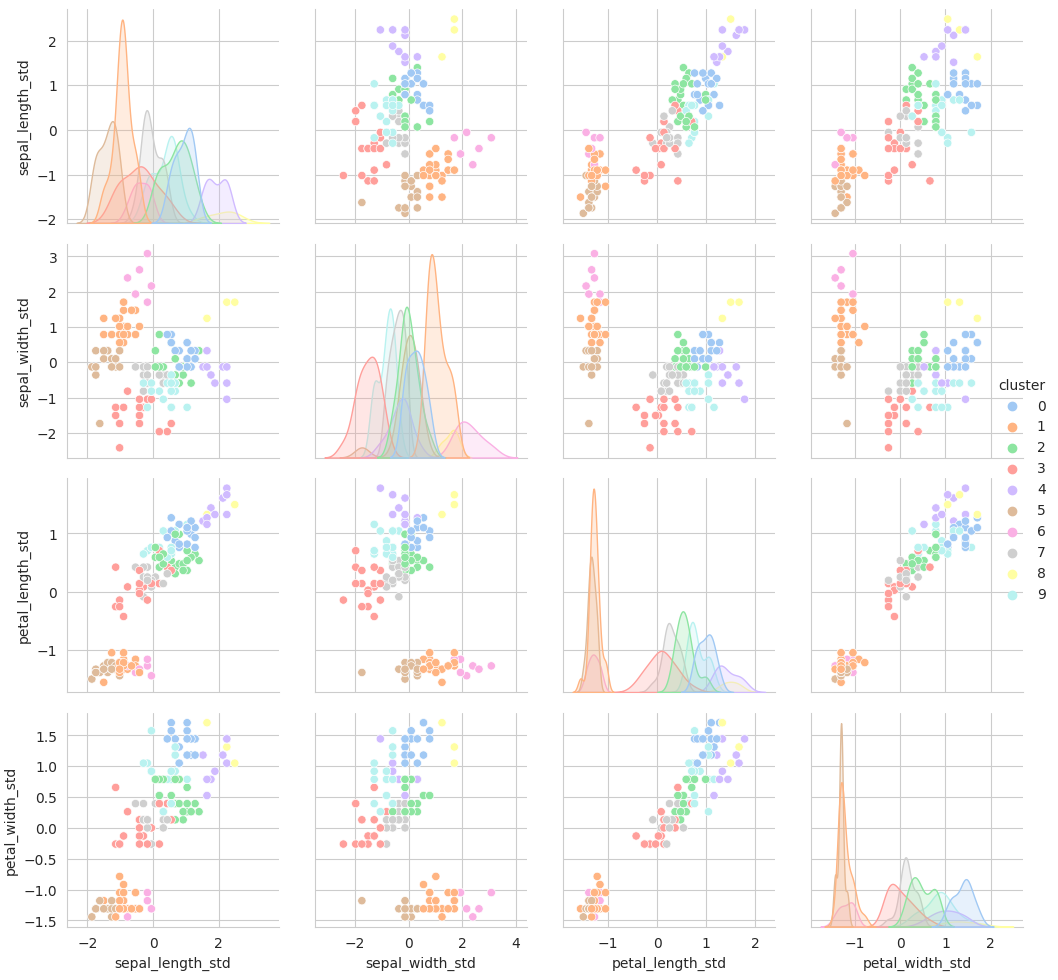

In [15]:
# resposta da questão 3.3.b

with sns.axes_style('whitegrid'):

    gf = sns.pairplot(data=clusterado, hue='cluster',palette='pastel')

**Comentário:** ?

## 4\. Predição  

### **4.1. Nova flor** 

Em qual cluster a flor abaixo seria alocada?


| sepal_length	| sepal_width | petal_length | petal_width |
| --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2.

In [ ]:
# resposta da questão 4.1

sepal_length_var = (5.1 - md_sp) / dp_sp
sepal_width_var = (3.5 - md_depth) / dp_depth
petal_length_var = (1.4 - md_flipper)/ dp_flipper
petal_width_var = (0.2 - md_flipper)/ dp_flipper


ex = [5.1,3.5,1.4,0.2]

ex_array = np.array(ex)



In [ ]:
md_sp = iris['sepal_length'].mean()
md_sw = iris['sepal_width'].mean()
md_pl = iris['petal_length'].mean()
md_pw = iris['petal_width'].mean()


dp_sp = iris['sepal_length'].std()
dp_sw = iris['sepal_width'].std()
dp_pl = iris['petal_length'].std()
dp_pw = iris['petal_width'].std()

---